In [1]:
from os import listdir, mkdir, system
from os.path import join, isfile, isdir
from skimage import io
from skimage import color

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

sup_folder = '/mnt/c/Users/bhaladik/mrcnn_development/training_data/NucleusSegDataExtended'
print(isdir(sup_folder))
subfolders = [join(sup_folder, f) for f in listdir(sup_folder) if isdir(join(sup_folder, f))]

test_folder = subfolders[1]


def get_matched_image_mask_paths(in_folder):
    all_filepaths = [join(in_folder, f) for f in listdir(in_folder) if isfile(join(in_folder, f))]
    all_images = [f for f in all_filepaths if '.jpg' in f]
    all_masks = [f for f in all_filepaths if 'gold' in f]
    all_images.sort()
    all_masks.sort()
    return all_images, all_masks

def maskpath_to_image(in_path):
    mask = np.loadtxt(in_path, skiprows=1).astype(np.int32)
    return mask

def check_random_image_mask_pair(in_folder):
    im_paths, mask_paths = get_matched_image_mask_paths(in_folder)
    index = np.random.choice(len(im_paths))
    im_path = im_paths[index]
    mask_path = mask_paths[index]
    mask_im = maskpath_to_image(mask_path)
    print(np.unique(mask_im))
    im = io.imread(im_path)
    im = color.rgb2gray(im)
    print(im.shape)
    fig, ax = plt.subplots(ncols=2, figsize=(17,12))
    ax[0].imshow(im)
    ax[1].imshow(mask_im)
    fig.show()

In /home/bhaladik/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bhaladik/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bhaladik/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/bhaladik/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bhaladik/.local/lib/python3.6/site-packages/matplotlib/

True


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
(768, 1024)


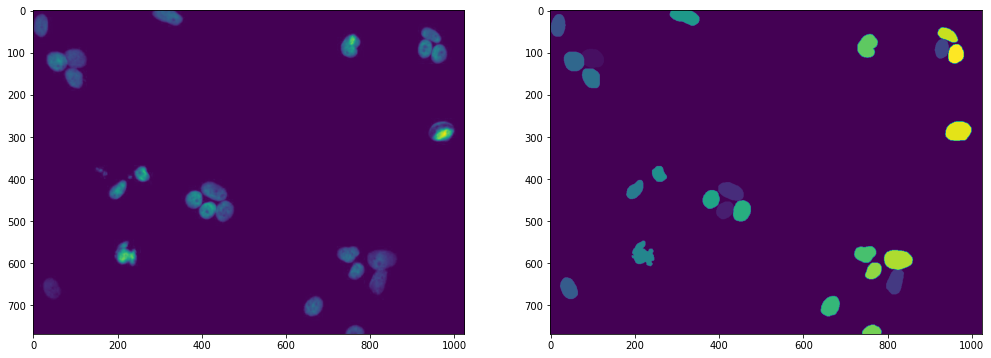

In [2]:
check_random_image_mask_pair(test_folder)

In [3]:
def convert_dataset_to_kromp_format(target_folder, out_folder, sub_im_folder='rawimages', sub_mask_folder='groundtruth', id_template='nuclei_{}.png'):
    subfolders = [join(target_folder, f) for f in listdir(target_folder) if isdir(join(target_folder, f))]
    im_id = 0
    if not isdir(out_folder):
        mkdir(out_folder)
    
    im_target_folder = join(out_folder, sub_im_folder)
    mask_target_folder = join(out_folder, sub_mask_folder)
    if isdir(im_target_folder):
        system('rm -r {}'.format(im_target_folder))
    if isdir(mask_target_folder):
        system('rm -r {}'.format(mask_target_folder))
    mkdir(im_target_folder)
    mkdir(mask_target_folder)
    for subfolder in subfolders:
        im_paths, mask_paths = get_matched_image_mask_paths(subfolder)
        for index in range(len(im_paths)):
            imname = id_template.format(im_id)
            im_path = im_paths[index]
            mask_path = mask_paths[index]
            mask_im = maskpath_to_image(mask_path)
            #print(np.unique(mask_im))
            im = io.imread(im_path)
            #print(im.dtype)
            #print(np.amax(im))
            #print(np.amin(im))
            im = color.rgb2gray(im)
            im = (im * 255).astype(np.uint8)
            #print(im.dtype)
            #print(np.amax(im))
            #print(np.amin(im))
            #print('----------------------------------------')
            io.imsave(join(im_target_folder, imname), im)
            io.imsave(join(mask_target_folder, imname), mask_im)
            im_id += 1
        print('Done with folder ' + subfolder)
    print('Done with processing {} images'.format(im_id))

In [4]:
convert_dataset_to_kromp_format(sup_folder, '/mnt/c/Users/bhaladik/mrcnn_development/training_data/gunesli_data')

/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/gunesli_data/groundtruth/nuclei_0.png is a low contrast image
Lossy conversion from int32 to uint8. Range [0, 7]. Convert image to uint8 prior to saving to suppress this warning.
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/gunesli_data/groundtruth/nuclei_1.png is a low contrast image
Lossy conversion from int32 to uint8. Range [0, 25]. Convert image to uint8 prior to saving to suppress this warning.
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/gunesli_data/groundtruth/nuclei_2.png is a low contrast image
Lossy conversion from int32 to uint8. Range [0, 21]. Convert image to uint8 prior to saving to suppress this warning.
/home/bhaladik/.local/lib/python

Done with folder /mnt/c/Users/bhaladik/mrcnn_development/training_data/NucleusSegDataExtended/HepG2TestSet


/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/gunesli_data/groundtruth/nuclei_25.png is a low contrast image
Lossy conversion from int32 to uint8. Range [0, 41]. Convert image to uint8 prior to saving to suppress this warning.
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/gunesli_data/groundtruth/nuclei_26.png is a low contrast image
Lossy conversion from int32 to uint8. Range [0, 210]. Convert image to uint8 prior to saving to suppress this warning.
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/gunesli_data/groundtruth/nuclei_27.png is a low contrast image
Lossy conversion from int32 to uint8. Range [0, 247]. Convert image to uint8 prior to saving to suppress this warning.
/home/bhaladik/.local/lib/

Done with folder /mnt/c/Users/bhaladik/mrcnn_development/training_data/NucleusSegDataExtended/Huh7TestSet


/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/gunesli_data/groundtruth/nuclei_36.png is a low contrast image
Lossy conversion from int32 to uint8. Range [0, 27]. Convert image to uint8 prior to saving to suppress this warning.
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/gunesli_data/groundtruth/nuclei_37.png is a low contrast image
Lossy conversion from int32 to uint8. Range [0, 176]. Convert image to uint8 prior to saving to suppress this warning.
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/gunesli_data/groundtruth/nuclei_38.png is a low contrast image
Lossy conversion from int32 to uint8. Range [0, 9]. Convert image to uint8 prior to saving to suppress this warning.
/home/bhaladik/.local/lib/py

Done with folder /mnt/c/Users/bhaladik/mrcnn_development/training_data/NucleusSegDataExtended/TrainingSet
Done with processing 61 images
